<a href="https://colab.research.google.com/github/amulyaojha11/Temperature-Prediction-of-Indian-Cities/blob/main/Prediction/Delhi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ARIMA and Seasonal ARIMA**

**Autoregressive Integrated Moving Averages**

The general process for ARIMA models is the following:



*   Visualize the Time Series Data
*   Make the time series data stationary
*   Plot the Correlation and AutoCorrelation Charts
*   Construct the ARIMA Model or Seasonal ARIMA based on the data
*   Use the model to make predictions




In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Delhi.csv')

In [3]:
df.head()

,Date,Temperature
0,2009-01-01,14.8
1,2009-02-01,18.3
2,2009-03-01,23.5
3,2009-04-01,29.7
4,2009-05-01,32.4


In [4]:
df.tail()

,Date,Temperature
122,2019-03-01,22.4
123,2019-04-01,31.0
124,2019-05-01,33.8
125,2019-06-01,35.7
126,2019-07-01,31.8


In [5]:
# Convert Month into Datetime
df['Date']=pd.to_datetime(df['Date'])

In [6]:
df.head()

,Date,Temperature
0,2009-01-01,14.8
1,2009-02-01,18.3
2,2009-03-01,23.5
3,2009-04-01,29.7
4,2009-05-01,32.4


In [7]:
df.set_index('Date',inplace=True)

In [8]:
df.head()

,Temperature
Date,
2009-01-01,14.8
2009-02-01,18.3
2009-03-01,23.5
2009-04-01,29.7
2009-05-01,32.4


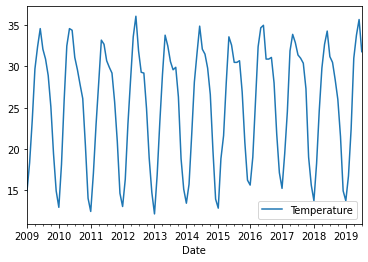

In [9]:
df.plot()

In [10]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
test_result=adfuller(df['Temperature'])

In [12]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Temperature):
    result=adfuller(Temperature)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [13]:
adfuller_test(df['Temperature'])

ADF Test Statistic : -1.7331044251336358
p-value : 0.41414182197652416
#Lags Used : 13
Number of Observations Used : 113
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


**Differencing**

In [14]:
df['Temperature First Difference'] = df['Temperature'] - df['Temperature'].shift(1)

In [15]:
df['Temperature'].shift(1)

Date
2009-01-01     NaN
2009-02-01    14.8
2009-03-01    18.3
2009-04-01    23.5
2009-05-01    29.7
              ... 
2019-03-01    16.7
2019-04-01    22.4
2019-05-01    31.0
2019-06-01    33.8
2019-07-01    35.7
Name: Temperature, Length: 127, dtype: float64

In [16]:
df['Seasonal First Difference']=df['Temperature']-df['Temperature'].shift(12)

In [17]:
df.head(14)

,Temperature,Temperature First Difference,Seasonal First Difference
Date,,,
2009-01-01,14.8,NaN,NaN
2009-02-01,18.3,3.5,NaN
2009-03-01,23.5,5.2,NaN
2009-04-01,29.7,6.2,NaN
2009-05-01,32.4,2.7,NaN
2009-06-01,34.6,2.2,NaN
2009-07-01,32.1,-2.5,NaN
2009-08-01,30.9,-1.2,NaN
2009-09-01,28.9,-2.0,NaN


In [18]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -2.8226702453506007
p-value : 0.05510774185780258
#Lags Used : 12
Number of Observations Used : 102
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


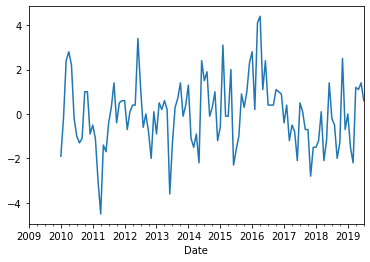

In [19]:
df['Seasonal First Difference'].plot()

In [43]:
df['Seasonal Second Difference']=df['Seasonal First Difference']-df['Seasonal First Difference'].shift(12)

In [44]:
## Again test dickey fuller test
adfuller_test(df['Seasonal Second Difference'].dropna())

ADF Test Statistic : -3.7777604117543557
p-value : 0.003143229356806359
#Lags Used : 13
Number of Observations Used : 89
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


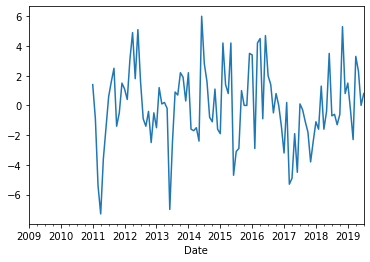

In [45]:
df['Seasonal Second Difference'].plot()

**Auto Regressive Model**

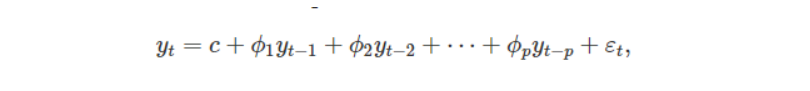

In [20]:
import pandas

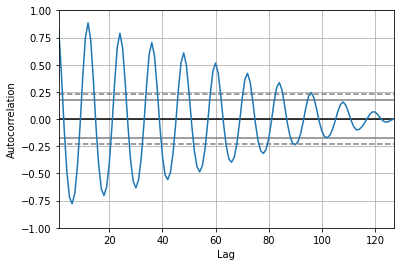

In [21]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Temperature'])
plt.show()

**Final Thoughts on Autocorrelation and Partial Autocorrelation**



*   Identification of an AR model is often best done with the PACF.
*   For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
*   Identification of an MA model is often best done with the ACF rather than the PACF.

*   For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.
p,d,q p AR model lags d differencing q MA lags



In [22]:
import statsmodels as sm

In [23]:
import statsmodels.api as sm

In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


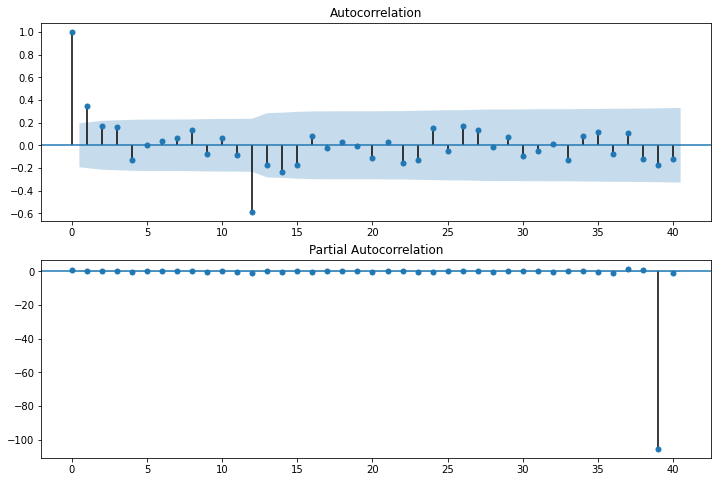

In [47]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal Second Difference'].iloc[25:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal Second Difference'].iloc[25:],lags=40,ax=ax2)

#**Train the model**

In [48]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [50]:
model=ARIMA(df['Temperature'],order=(1,2,0))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [51]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D2.Temperature   No. Observations:                  125
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -321.966
Method:                       css-mle   S.D. of innovations              3.179
Date:                Fri, 19 Nov 2021   AIC                            649.931
Time:                        19:47:14   BIC                            658.416
Sample:                    03-01-2009   HQIC                           653.378
                         - 07-01-2019                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0693      0.374     -0.185      0.853      -0.802       0.663
ar.L1.D2.Temperature     0.2413      0.088      2.754      0.007       0.070       0.413
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            4.1439           +0.0000j            4.1439            0.0000
-----------------------------------------------------------------------------
"""

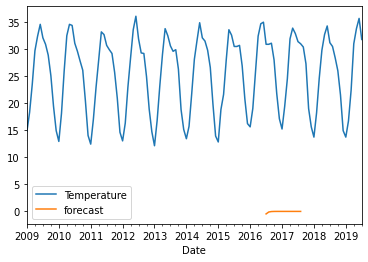

In [52]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Temperature','forecast']].plot()

In [53]:
future_datest_df.tail()

,Temperature,Temperature First Difference,Seasonal First Difference,forecast
2021-02-01,NaN,NaN,NaN,NaN
2021-03-01,NaN,NaN,NaN,NaN
2021-04-01,NaN,NaN,NaN,NaN
2021-05-01,NaN,NaN,NaN,NaN
2021-06-01,NaN,NaN,NaN,NaN


In [55]:
import statsmodels.api as sm

In [56]:
model=sm.tsa.statespace.SARIMAX(df['Temperature'],order=(1, 2, 1),seasonal_order=(1,2,1,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


#**Test the model**

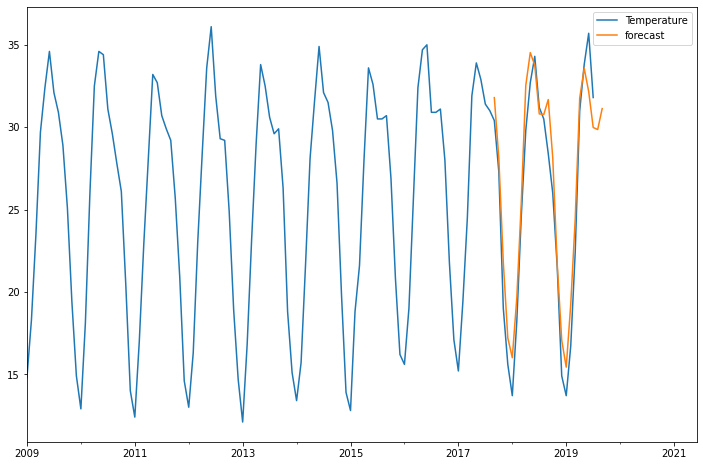

In [57]:
future_df['forecast'] = results.predict(start = 104, end = 128, dynamic= True)  
future_df[['Temperature', 'forecast']].plot(figsize=(12, 8)) 

## Predicting future values

In [58]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [59]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [60]:
future_df=pd.concat([df,future_datest_df])

In [61]:
future_datest_df.tail()

,Temperature,Temperature First Difference,Seasonal First Difference,forecast,Seasonal Second Difference
2021-02-01,NaN,NaN,NaN,NaN,NaN
2021-03-01,NaN,NaN,NaN,NaN,NaN
2021-04-01,NaN,NaN,NaN,NaN,NaN
2021-05-01,NaN,NaN,NaN,NaN,NaN
2021-06-01,NaN,NaN,NaN,NaN,NaN


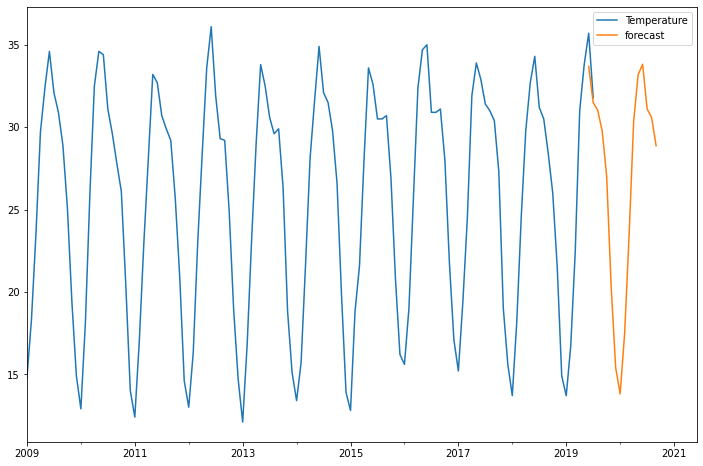

In [62]:
future_df['forecast'] = results.predict(start = 125, end = 140, dynamic= True)  
future_df[['Temperature', 'forecast']].plot(figsize=(12, 8))